In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# from sem_covid.services.sc_wrangling.feature_selector import reduce_array_column
from sem_covid.services.data_registry import Dataset
from sem_covid.services.pwdb_base_experiment import PWDBBaseExperiment
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import TopicInformation, generate_wordcloud
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.lda_modeling import WordsModeling

from sem_covid.services.sc_wrangling.data_cleaning import clean_remove_urls, clean_remove_numbers, clean_remove_emails, clean_remove_stopwords

ValueError: invalid literal for int() with base 10: '30.0'

#### Download dataset
#### Use base experiment function to concatenate and clean text data

In [2]:
pwdb = Dataset.PWDB.fetch()

[2021-05-18 13:08:57,994] {data_source.py:46} INFO - Fetching ds_pwdb from the remote source
[2021-05-18 13:08:58,077] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/ds_pwdb/_count [status:200 request:0.082s]
[2021-05-18 13:09:02,629] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/ds_pwdb/_search?scroll=5m&size=1000 [status:200 request:4.353s]


N/A% (0 of 1288) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

[2021-05-18 13:09:04,705] {base.py:262} INFO - POST http://srv.meaningfy.ws:9200/_search/scroll [status:200 request:1.579s]


100% (1288 of 1288) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


In [4]:
pwdb_descriptive_data = pwdb['title'].map(str) + ' ' + \
                        pwdb['background_info_description'].map(str) + ' ' + \
                        pwdb['content_of_measure_description'].map(str) + ' ' + \
                        pwdb['use_of_measure_description'] + ' ' + \
                        pwdb['involvement_of_social_partners_description']

[2021-05-18 13:11:12,593] {utils.py:157} INFO - NumExpr defaulting to 4 threads.


In [31]:
pwdb_descriptive_data.values

array(["Agreement on a teleworking regime During the COVID-19 crisis, teleworking has been identified as a vital pillar to keep companies working and prevent social hardship. Discussions between the two representative social partners OGBL and LCGB and the employer association UEL, together with the Ministry of Work and Employment, led in a first instance to a joint assessment on teleworking at the level of the Economic and Social Council CES. From there, discussions continued between the social partners and an inter-professional agreement could have been signed between the social partners in October 2020.  Applied for a period of three years and covering all sectors in Luxembourg (with the exception of transport), the agreement provides a definition of teleworking: \r\r* Teleworking is identified as a form of organisational work, conducted by digital means and usually done at the company, but that is transferred to the location where the employee lives. \r* The work is considered as te

In [119]:
data_wo_urls = clean_remove_urls(pwdb_descriptive_data.values)
data_wo_numbers = clean_remove_numbers(data_wo_urls)
data_wo_emails = clean_remove_emails(data_wo_numbers)

In [121]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(data_wo_emails)
sentences = list(doc.sents)

nouns: list = []

for sentence in sentences:
    for token in sentence:
        if token.pos_ == "NOUN":
            nouns.append(token)


2

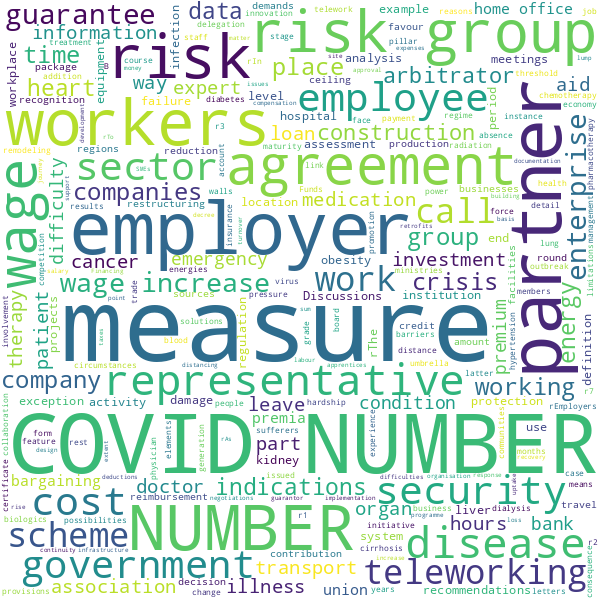

In [124]:
generate_wordcloud(str(nouns))